In [239]:
import pandas as pd
import numpy as np 
from numpy import log

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [240]:
#Setting Styles

sns.set_style('darkgrid')

In [241]:
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv',
                     index_col=[0],parse_dates=[0],usecols=[0,2])

In [242]:
amazon.head()

,High
Date,
2006-01-03,47.85
2006-01-04,47.73
2006-01-05,48.20
2006-01-06,48.58
2006-01-09,47.10


In [243]:
amazon.values

array([[  47.85],
       [  47.73],
       [  48.2 ],
       ...,
       [1187.29],
       [1190.1 ],
       [1184.  ]])

In [244]:
amazon.tail()

,High
Date,
2017-12-22,1174.62
2017-12-26,1178.32
2017-12-27,1187.29
2017-12-28,1190.10
2017-12-29,1184.00


In [245]:
amazon.describe()

,High
count,3019.000000
mean,302.371163
std,281.826442
min,26.300000
25%,82.580000
50%,208.000000
75%,379.155000
max,1213.410000


In [246]:
amazon.isna().any().sum()

0

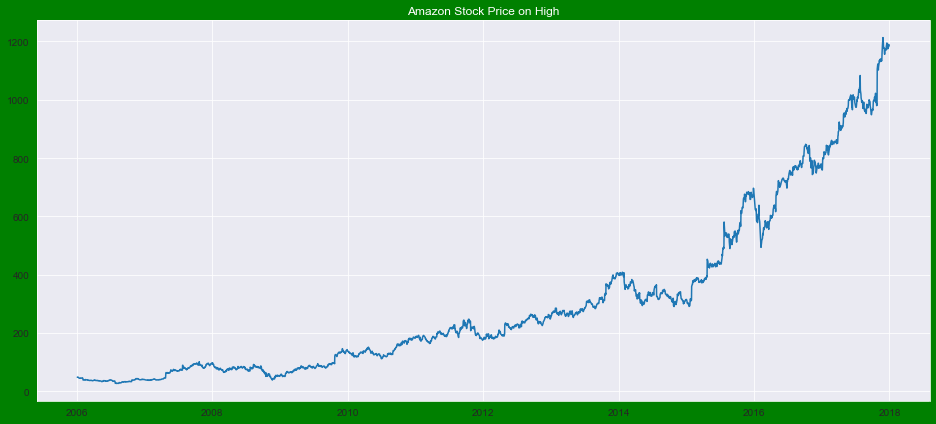

In [247]:
plt.figure(figsize=[16,7],facecolor='g')
plt.plot(amazon)
plt.title('Amazon Stock Price on High',fontdict={'color':'w'})
plt.show()

In [248]:
import plotly.express as px

fig = px.line(amazon, x=amazon.index, y="High", title='Amazon Stock Price on High')
fig.show()

# Testing for stationary

# Method 1

In [249]:
# checking guessian distribution

## Normal Distribution look like

![title](img/Normal_Distribution.png)

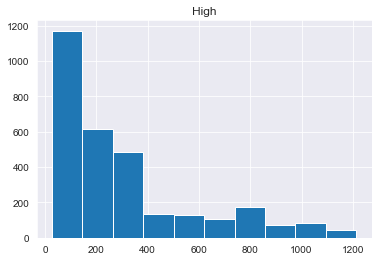

In [250]:
amazon.hist()
plt.show()

# Method 1

In [251]:
# A quick and dirty check to see if your time series is non-stationary is to review summary statistics.
# You can split your time series into two (or more) partitions and compare the mean and variance of each group.
#If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [252]:
X = amazon.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=100.900113, mean2=503.975726
variance1=3255.585439, variance2=74332.661515


In [253]:
# Running the example shows that indeed the distribution of values does not 
# look like a Gaussian, therefore the mean and variance values are less meaningful.

# This squashed distribution of the observations may be 
# another indicator of a non-stationary time series.

# Method 2 trying with log

In [254]:
# Below is the same histogram with a log transform of the time series.

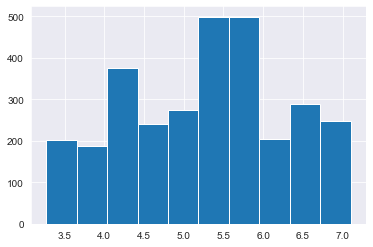

In [255]:
X = amazon.values
X = np.log(X)
plt.hist(X)
plt.show()

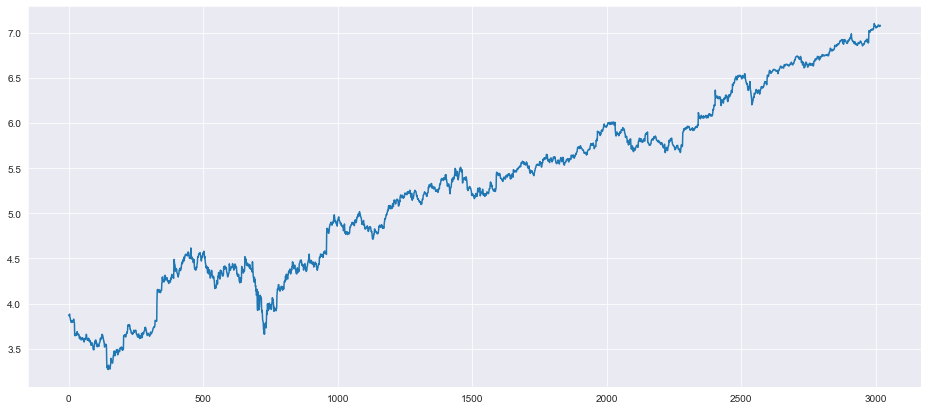

In [256]:
# We also create a line plot of the log transformed data and can see the
# exponential growth seems diminished, but we still have a trend and seasonal elements.
plt.figure(figsize=[16,7])

plt.plot(X)
plt.show()

In [257]:
# We can now calculate the mean and standard deviation of the values of the log transformed dataset.
X = amazon.values
X = np.log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.448328, mean2=6.082300
variance1=0.345983, variance2=0.276628


# Method 3

# Augmented Dickey-Fuller test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used.
It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root,
that it is not stationary (has some time-dependent structure).
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary

## Null Hypothesis (H0): ## 
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
## Alternate Hypothesis (H1): ## 
The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [258]:
from statsmodels.tsa.stattools import adfuller
def adfuller_fun(X):
    X = X.values
    result = adfuller(X)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
            
adfuller_fun(amazon['High'])        

ADF Statistic: 2.636569
p-value: 0.999081
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [259]:
# # As part of the output, we get a look-up table to help determine the ADF statistic. 
# # We can see that our statistic value of 2 is more than the value of -3.433 at 1%.

# The test statistic is positive, meaning we are much less likely to reject the null hypothesis 
# (it looks non-stationary).

# Comparing the test statistic to the critical values, it looks like 
# we would have to fail to reject the null hypothesis that the time series is
# non-stationary and does have time-dependent structure.

In [260]:
# Let’s log transform the dataset again to make the distribution of 
# values more linear and better meet the expectations of this statistical test.
def adfuller_log(X):
    X = X.values
    X = np.log(X)
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
adfuller_log(amazon)

ADF Statistic: -0.240137
p-value: 0.933565
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [261]:
# Running the example shows a negative value for the test statistic.

# We can see that the value is larger than the critical values, again, 
# meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

# Making time series to stationary

## Difference Transform ##
Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.

In [262]:
amazon['Sales first difference'] = amazon['High'] - amazon['High'].shift(1)


# Seasonal Differencing

In [263]:
amazon['Seasonal Sales difference'] = amazon['High'] - amazon['High'].shift(30)

In [264]:
amazon.head()

,High,Sales first difference,Seasonal Sales difference
Date,,,
2006-01-03,47.85,NaN,NaN
2006-01-04,47.73,-0.12,NaN
2006-01-05,48.20,0.47,NaN
2006-01-06,48.58,0.38,NaN
2006-01-09,47.10,-1.48,NaN


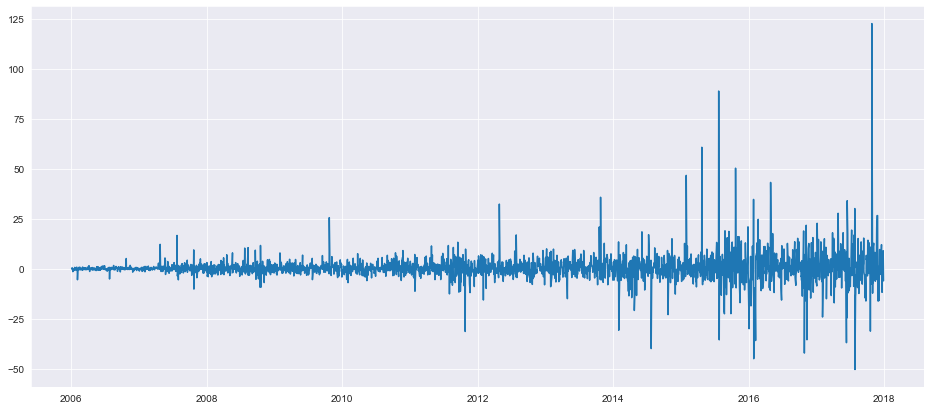

In [265]:
plt.figure(figsize=[16,7])
plt.plot(amazon['Sales first difference'].dropna())
plt.show()

In [266]:
amazon['Sales first difference log'] = log(amazon['High']) - log(amazon['High'].shift(1))

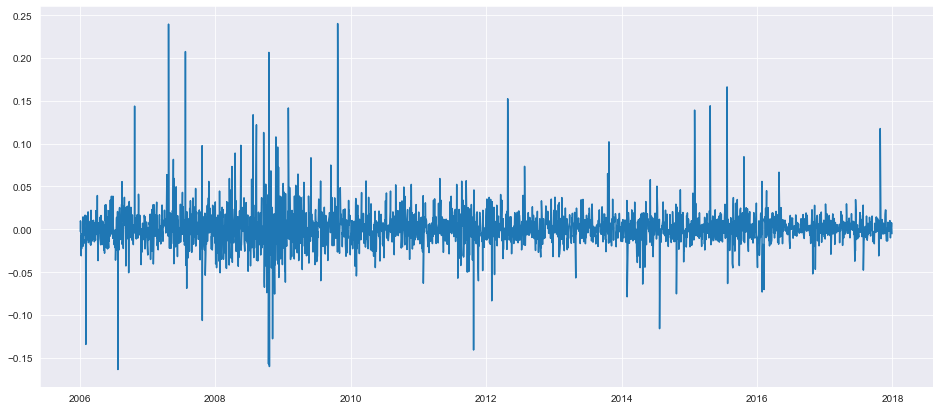

In [267]:
plt.figure(figsize=[16,7])
plt.plot(amazon['Sales first difference log'].dropna())
plt.show()

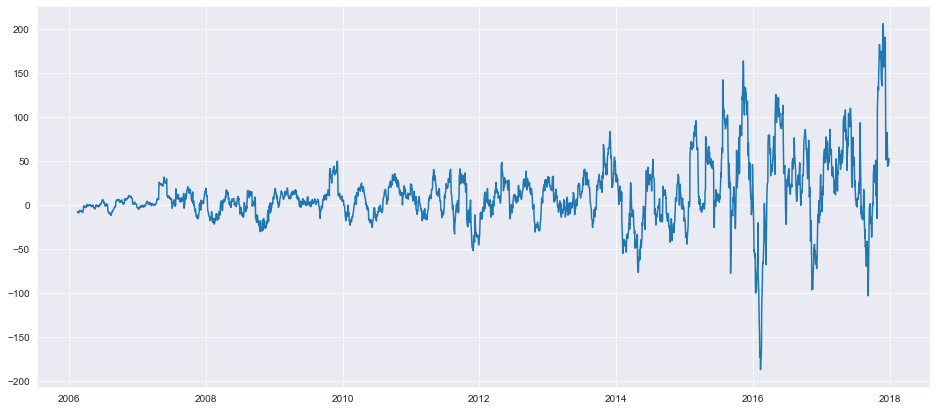

In [268]:
plt.figure(figsize=[16,7])
plt.plot(amazon['Seasonal Sales difference'].dropna())
plt.show()

In [269]:
adfuller_fun(amazon['Seasonal Sales difference'].dropna())

ADF Statistic: -10.867595
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [270]:
adfuller_fun(amazon['Sales first difference'].dropna())

ADF Statistic: -10.210084
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


## Transformation
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our air passenger dataset:

In [271]:

amazon['Seasonal Sales difference log'] = log(amazon['High']) - log(amazon['High'].shift(30))

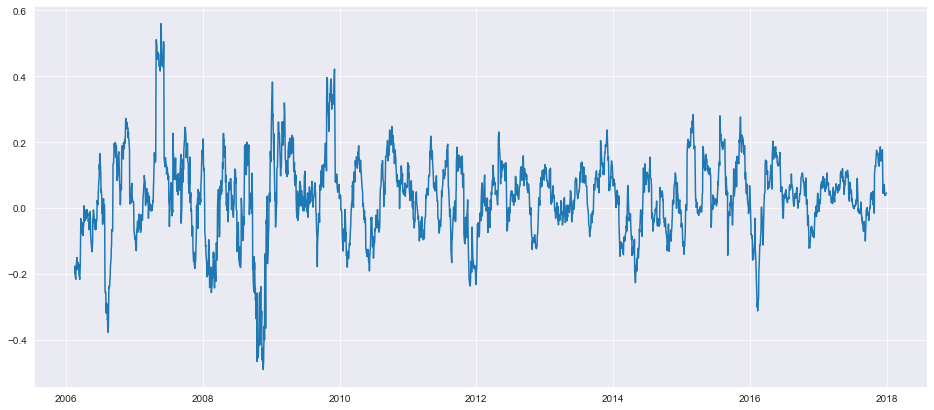

In [272]:
plt.figure(figsize=[16,7])
plt.plot(amazon['Seasonal Sales difference log'].dropna())
plt.show()

# ARIMA MODEL

In [273]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

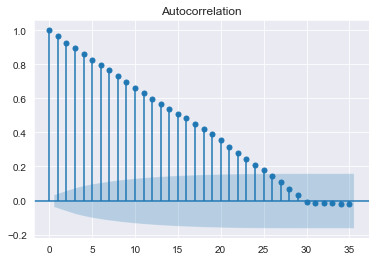

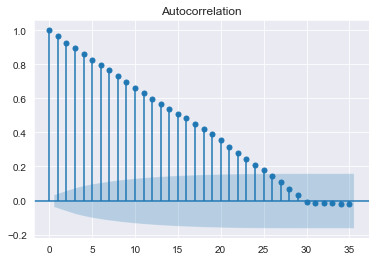

In [274]:
# for q 
plot_acf(amazon['Seasonal Sales difference log'].dropna( ))

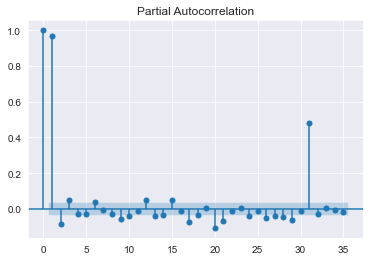

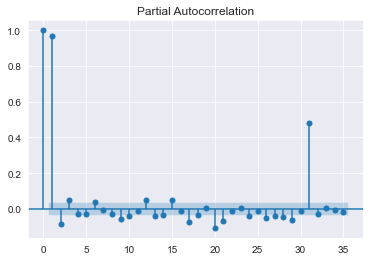

In [275]:
#to identify value for p
plot_pacf(amazon['Seasonal Sales difference log'].dropna())

In [276]:
# p =3 ,q= 27, d=1

In [277]:
amz_arima  =  amazon['Seasonal Sales difference log'].dropna()

In [278]:
amazon['Seasonal Sales difference log'].size

3019

In [279]:
amz_train = amz_arima[0:2000]
amz_test = amz_arima[2000:2990]

In [280]:
amz_test.size

989

In [281]:
from statsmodels.tsa.arima_model import ARIMA

In [282]:
amz_model = ARIMA(amz_train,order=(3,0,2))

In [283]:
amz_fit = amz_model.fit(disp=0)

In [284]:
amz_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ARMA Model Results                                   
=========================================================================================
Dep. Variable:     Seasonal Sales difference log   No. Observations:                 2000
Model:                                ARMA(3, 2)   Log Likelihood                3898.246
Method:                                  css-mle   S.D. of innovations              0.034
Date:                           Thu, 10 Sep 2020   AIC                          -7782.492
Time:                                   23:06:42   BIC                          -7743.285
Sample:                                        0   HQIC                         -7768.096
                                                                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0299      0.023      1.289      0.197      -0.016       0.075
ar.L1.Seasonal Sales difference log     0.0863      0.016      5.332      0.000       0.055       0.118
ar.L2.Seasonal Sales difference log    -0.0985      0.013     -7.719      0.000      -0.124      -0.074
ar.L3.Seasonal Sales difference log     0.9164      0.022     41.268      0.000       0.873       0.960
ma.L1.Seasonal Sales difference log     0.9432      0.005    186.332      0.000       0.933       0.953
ma.L2.Seasonal Sales difference log     0.9790      0.018     54.830      0.000       0.944       1.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4638           -0.9161j            1.0268           -0.3246
AR.2           -0.4638           +0.9161j            1.0268            0.3246
AR.3            1.0350           -0.0000j            1.0350           -0.0000
MA.1           -0.4817           -0.8885j            1.0107           -0.3291
MA.2           -0.4817           +0.8885j            1.0107            0.3291
-----------------------------------------------------------------------------
"""

In [285]:
amz_forecast = amz_fit.predict(start=2000,end=2990)

In [286]:
amz_forecast

2000    0.021913
2001    0.025337
2002    0.025784
2003    0.022671
2004    0.025496
          ...   
2986    0.029862
2987    0.029862
2988    0.029862
2989    0.029862
2990    0.029862
Length: 991, dtype: float64

In [287]:
amz_test

Date
2014-01-29    0.008769
2014-01-30    0.036472
2014-01-31   -0.041503
2014-02-03   -0.093709
2014-02-04   -0.115370
                ...   
2017-12-22    0.039063
2017-12-26    0.040325
2017-12-27    0.040733
2017-12-28    0.044765
2017-12-29    0.045133
Name: Seasonal Sales difference log, Length: 989, dtype: float64

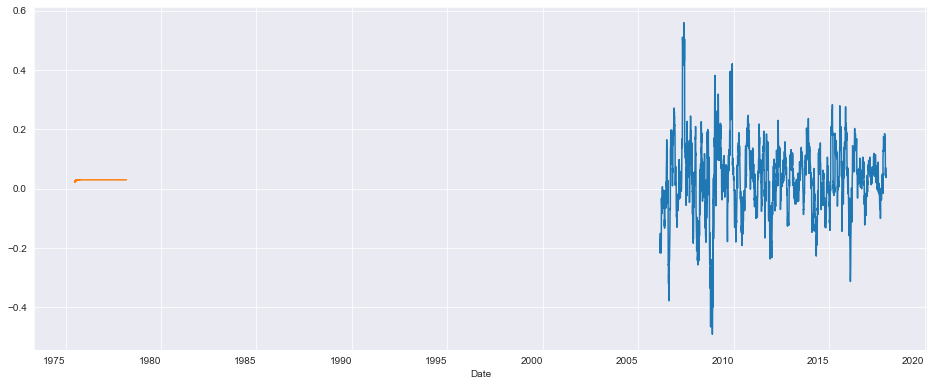

In [288]:
plt.figure(figsize=[16,7])
amz_arima.plot()
amz_forecast.plot()
plt.show()

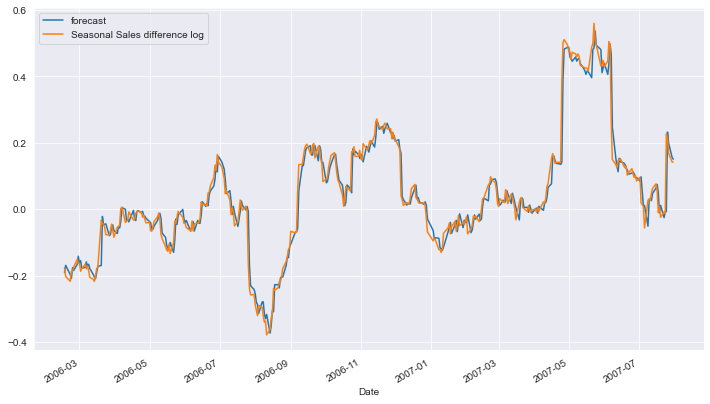

In [289]:
fig, ax = plt.subplots(figsize=(12, 7))

amz_fit.plot_predict(1,365,ax=ax)
plt.show()